In [1]:
#importing libraries and warnings

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

In [2]:
# reading the data
curr_application=pd.read_csv('C:\\Users\\Admin\\Downloads\\application_data.csv')
prev_application=pd.read_csv('C:\\Users\\Admin\\Downloads\\previous_application.csv')


## DATA CLEANING

### Deleting columns having null values more than 40 percent

In [3]:
# check the columns where missing values are more than 40 percent and see if there are any columns which is very important.
 
curr_application.columns[curr_application.isnull().mean()>0.4]


Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [4]:
# Since none of the above columns are important and contain more than 40% null values, we can drop them.

curr_application.drop(curr_application.columns[curr_application.isnull().mean()>0.4],axis=1, inplace=True)
curr_application.shape

(307511, 73)

In [5]:
# similarly check for previous application data,where missing values are more than 40% and see if there are any columns which is very important.

prev_application.columns[prev_application.isnull().mean()>0.4]


Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [6]:
# dropping columns with more than 40% missing values for prev application data.
prev_application.drop(prev_application.columns[prev_application.isnull().mean()>0.4],axis=1, inplace=True)
prev_application.shape

(1670214, 26)

In [7]:
# remaining columns of current application data.
curr_application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

#### check remaining columns for null values or data type inconsistency

In [8]:
curr_application.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [9]:
# describe CODE_GENDER column
curr_application.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [10]:
# replace 'xna' with the mode which is 'F' in this case.
curr_application.CODE_GENDER= curr_application.CODE_GENDER.replace('XNA','F')
curr_application.CODE_GENDER.value_counts()



F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [11]:
# check null values in amt_annuity.
curr_application.AMT_ANNUITY.isnull().sum()

12

In [12]:
# since only 12 null values are there, we can simply drop them.
curr_application=curr_application[~curr_application.AMT_ANNUITY.isnull()]

In [13]:
# check null values in AMT_GOODS_PRICE.
curr_application.AMT_GOODS_PRICE.isnull().sum()

278

In [14]:
# describe AMT_GOODS_PRICE and check the median
curr_application.AMT_GOODS_PRICE.describe()

count    3.072210e+05
mean     5.383973e+05
std      3.694484e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [15]:
# replace the null values with the median.
curr_application.AMT_GOODS_PRICE.fillna(450000,inplace=True)

In [16]:
# check null values in OCCUPATION_TYPE.
curr_application.OCCUPATION_TYPE.isnull().sum()

96391

In [17]:
# since null value is even more than the mode in this case,we can drop the OCCUPATION_TYPE coz it will provide no useful
# insight due to data insufficiency.
curr_application.OCCUPATION_TYPE.value_counts().head()

Laborers       55184
Sales staff    32101
Core staff     27569
Managers       21370
Drivers        18602
Name: OCCUPATION_TYPE, dtype: int64

In [18]:
curr_application.drop('OCCUPATION_TYPE',axis=1,inplace=True)


In [19]:
# check null values in ORGANIZATION_TYPE.
curr_application.ORGANIZATION_TYPE.value_counts().head()

Business Entity Type 3    67989
XNA                       55374
Self-employed             38409
Other                     16681
Medicine                  11192
Name: ORGANIZATION_TYPE, dtype: int64

In [20]:
# replacing 'xna' with 'not known'
curr_application.ORGANIZATION_TYPE= curr_application.ORGANIZATION_TYPE.replace('XNA','Not_known')
curr_application.ORGANIZATION_TYPE.value_counts().head()

Business Entity Type 3    67989
Not_known                 55374
Self-employed             38409
Other                     16681
Medicine                  11192
Name: ORGANIZATION_TYPE, dtype: int64

In [21]:
curr_application.TARGET.value_counts()

0    282674
1     24825
Name: TARGET, dtype: int64

In [22]:
# checking whether columns like AMT_REQ_CREDIT_BUREAU_MON have any imp insight
print(curr_application.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True).head())
print((curr_application.groupby('AMT_REQ_CREDIT_BUREAU_MON')['TARGET'].sum()/20422).head())

0.0    0.835500
1.0    0.124607
2.0    0.020246
3.0    0.007485
4.0    0.004045
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
AMT_REQ_CREDIT_BUREAU_MON
0.0    0.847860
1.0    0.125355
2.0    0.018558
3.0    0.005288
4.0    0.002938
Name: TARGET, dtype: float64


In [23]:
# checking whether columns like REG_REGION_NOT_LIVE_REGION have any imp insight
print(curr_application.REG_REGION_NOT_LIVE_REGION.value_counts(normalize=True))
print(curr_application.groupby('REG_REGION_NOT_LIVE_REGION')['TARGET'].sum()/24800)

0    0.984858
1    0.015142
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64
REG_REGION_NOT_LIVE_REGION
0    0.983548
1    0.017460
Name: TARGET, dtype: float64


<!--  -->
In the above analysis we can se that columns similar to AMT_REQ_CREDIT_BUREAU_MON and REG_REGION_NOT_LIVE_REGION are not that important for this analysis, moreover to check this assumption we grouped the variables against the target variable and saw that they are occuring in the same percentage as their value counts in the data.
Hence,we can say that these columns dont provide any important insight.


In [24]:
# check the value counts for flag documents.

print(curr_application.FLAG_DOCUMENT_2.value_counts(normalize=True))
print(curr_application.FLAG_DOCUMENT_3.value_counts(normalize=True))
print(curr_application.FLAG_DOCUMENT_4.value_counts(normalize=True))
print(curr_application.FLAG_DOCUMENT_5.value_counts(normalize=True))
print(curr_application.FLAG_DOCUMENT_6.value_counts(normalize=True))
print(curr_application.FLAG_DOCUMENT_7.value_counts(normalize=True))
print(curr_application.FLAG_DOCUMENT_8.value_counts(normalize=True))
print(curr_application.FLAG_DOCUMENT_9.value_counts(normalize=True))
print(curr_application.FLAG_DOCUMENT_10.value_counts(normalize=True))
print(curr_application.FLAG_DOCUMENT_11.value_counts(normalize=True))
print(curr_application.FLAG_DOCUMENT_12.value_counts(normalize=True))
print(curr_application.FLAG_DOCUMENT_13.value_counts(normalize=True))
print(curr_application.FLAG_DOCUMENT_14.value_counts(normalize=True))
print(curr_application.FLAG_DOCUMENT_15.value_counts(normalize=True))
print(curr_application.FLAG_DOCUMENT_16.value_counts(normalize=True))
print(curr_application.FLAG_DOCUMENT_17.value_counts(normalize=True))
print(curr_application.FLAG_DOCUMENT_18.value_counts(normalize=True))
print(curr_application.FLAG_DOCUMENT_19.value_counts(normalize=True))
print(curr_application.FLAG_DOCUMENT_20.value_counts(normalize=True))
print(curr_application.FLAG_DOCUMENT_21.value_counts(normalize=True))

0    0.999958
1    0.000042
Name: FLAG_DOCUMENT_2, dtype: float64
1    0.710025
0    0.289975
Name: FLAG_DOCUMENT_3, dtype: float64
0    0.999919
1    0.000081
Name: FLAG_DOCUMENT_4, dtype: float64
0    0.984891
1    0.015109
Name: FLAG_DOCUMENT_5, dtype: float64
0    0.911941
1    0.088059
Name: FLAG_DOCUMENT_6, dtype: float64
0    0.999808
1    0.000192
Name: FLAG_DOCUMENT_7, dtype: float64
0    0.918627
1    0.081373
Name: FLAG_DOCUMENT_8, dtype: float64
0    0.996104
1    0.003896
Name: FLAG_DOCUMENT_9, dtype: float64
0    0.999977
1    0.000023
Name: FLAG_DOCUMENT_10, dtype: float64
0    0.996088
1    0.003912
Name: FLAG_DOCUMENT_11, dtype: float64
0    0.999993
1    0.000007
Name: FLAG_DOCUMENT_12, dtype: float64
0    0.996475
1    0.003525
Name: FLAG_DOCUMENT_13, dtype: float64
0    0.997063
1    0.002937
Name: FLAG_DOCUMENT_14, dtype: float64
0    0.99879
1    0.00121
Name: FLAG_DOCUMENT_15, dtype: float64
0    0.990072
1    0.009928
Name: FLAG_DOCUMENT_16, dtype: float64
0    

<!--  -->


#Reasons for dropping some of the columns.
1. Apart from flag_document 3,5 and 8, rest all have more than 99% of values equal to '0', i.e data is heavily skewed and more than 99% clients have not provided the documents.Hence, the columns become irrelevant.
2. In the above analysis we can se that columns similar to AMT_REQ_CREDIT_BUREAU_MON and REG_REGION_NOT_LIVE_REGION are not that important for this analysis, moreover to check this assumption we grouped the variables against the target variable and saw that they are occuring in the same percentage as their value counts in the data. Hence,we can say that these columns dont provide any important insight.


In [25]:
# droping irrelevant columns from the current application data.

curr_application.drop(['NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE','FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_PHONE',
'FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7',  'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], axis=1,inplace=True)

In [26]:
# check for any null values in data
curr_application.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_CONT_MOBILE                   0
REGION_RATING_CLIENT_W_CITY        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
O

In [27]:
curr_application.OBS_30_CNT_SOCIAL_CIRCLE.describe()


count    306478.000000
mean          1.422291
std           2.401023
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [28]:
# removing the outlier as it is too far from the remaining data
curr_application.OBS_30_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True)
curr_application=curr_application[~(curr_application['OBS_30_CNT_SOCIAL_CIRCLE']==348)]

In [29]:
curr_application.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306477.000000
mean          0.143316
std           0.442501
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [30]:
# removing the outlier as it is too far from the remaining data
curr_application.DEF_30_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True)
curr_application=curr_application[~(curr_application['DEF_30_CNT_SOCIAL_CIRCLE']==34)]

In [31]:
# describing the data
curr_application.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count    306477.000000
mean          1.404220
std           2.297972
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          47.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [32]:
# filling the null values with the median

curr_application.OBS_60_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True)

In [33]:
curr_application.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count    306477.000000
mean          0.099975
std           0.359717
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [34]:
# filling the null values with the median
curr_application.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True)

In [35]:
curr_application.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265980.000000
mean          0.265475
std           0.794068
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [36]:
# removing the outlier as it is too far from the remaining data
curr_application.AMT_REQ_CREDIT_BUREAU_QRT.fillna(0, inplace=True)
curr_application=curr_application[~(curr_application['AMT_REQ_CREDIT_BUREAU_QRT']==261)]


In [37]:
curr_application.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265979.000000
mean          1.899928
std           1.869215
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [38]:
# filling the null values with the median
curr_application.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(1, inplace=True)

In [39]:
curr_application.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_CONT_MOBILE               0
REGION_RATING_CLIENT_W_CITY    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
FLAG_DOCUMENT_3                0
FLAG_DOCUM

#### Checking for any data type discrepency

In [40]:
curr_application.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_CONT_MOBILE                 int64
REGION_RATING_CLIENT_W_CITY      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY           int64
LIVE_CITY_NOT_WORK_CITY          int64
ORGANIZATION_TYPE               object
OBS_30_CNT_SOCIAL_CIRCLE 

ALL THE DATA TYPES ARE APPROPRIATE

In [41]:
prev_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

CHECKING THE VARIABLES OF THE PREV APPLICATION 

In [42]:
prev_application.AMT_ANNUITY.isnull().sum()

372235

In [43]:
#describing data to check for mean and median
prev_application.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [44]:
# filling missing values with mean as mean and median are close in this case.
prev_application.AMT_ANNUITY.fillna(15955,inplace=True)

In [45]:
# removing missing values as its just single missing value
prev_application.AMT_CREDIT.isnull().sum()

1

In [46]:
prev_application= prev_application[~prev_application.AMT_CREDIT.isnull()]

In [47]:
prev_application.CNT_PAYMENT.isnull().sum()

372230

In [48]:
prev_application.CNT_PAYMENT.describe()


count    1.297983e+06
mean     1.605409e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [49]:
# filling missing values with median
prev_application.CNT_PAYMENT.fillna(12,inplace=True)

In [50]:
prev_application.PRODUCT_COMBINATION.isnull().sum()

346

In [51]:
# removing missing values becoz removing 346 values wont effect the data

prev_application= prev_application[~prev_application.PRODUCT_COMBINATION.isnull()]

In [52]:
# dropping the irrelevant columns
prev_application.drop(['SK_ID_PREV','AMT_GOODS_PRICE','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY','NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON','NAME_PRODUCT_TYPE',
 'SELLERPLACE_AREA'], axis=1, inplace=True)

In [53]:
prev_application.isnull().sum()

SK_ID_CURR                0
NAME_CONTRACT_TYPE        0
AMT_ANNUITY               0
AMT_APPLICATION           0
AMT_CREDIT                0
NAME_CASH_LOAN_PURPOSE    0
NAME_CONTRACT_STATUS      0
DAYS_DECISION             0
NAME_CLIENT_TYPE          0
NAME_GOODS_CATEGORY       0
NAME_PORTFOLIO            0
CHANNEL_TYPE              0
NAME_SELLER_INDUSTRY      0
CNT_PAYMENT               0
NAME_YIELD_GROUP          0
PRODUCT_COMBINATION       0
dtype: int64

In [54]:
prev_application.dtypes

SK_ID_CURR                  int64
NAME_CONTRACT_TYPE         object
AMT_ANNUITY               float64
AMT_APPLICATION           float64
AMT_CREDIT                float64
NAME_CASH_LOAN_PURPOSE     object
NAME_CONTRACT_STATUS       object
DAYS_DECISION               int64
NAME_CLIENT_TYPE           object
NAME_GOODS_CATEGORY        object
NAME_PORTFOLIO             object
CHANNEL_TYPE               object
NAME_SELLER_INDUSTRY       object
CNT_PAYMENT               float64
NAME_YIELD_GROUP           object
PRODUCT_COMBINATION        object
dtype: object

THERE ARE NO MISSING DATA AND DATA TYPE ERROR IN THE PREV APPLICATION DATASET NOW.

#### Merging the current and previous application dataframe

In [55]:
final_data= curr_application.merge(prev_application, how= 'left', on=['SK_ID_CURR'])
final_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Approved,-606.0,New,Vehicles,POS,Stone,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Approved,-746.0,Repeater,XNA,Cash,Credit and cash offices,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Approved,-828.0,Refreshed,Furniture,POS,Stone,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Approved,-2341.0,Refreshed,Consumer Electronics,POS,Country-wide,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Approved,-815.0,New,Mobile,POS,Regional / Local,Connectivity,4.0,middle,POS mobile without interest


In [56]:
final_data.shape

(1429739, 49)

In [57]:
# checking the remaining columns in the final merged dataset.
final_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_CONT_MOBILE', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_8',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_y', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_CLIENT_TYPE', 'NAME_GOOD

### Standardization of values

In [58]:
# converting days since birth to age in years.
final_data['AGE_IN_YEARS']= abs(final_data.DAYS_BIRTH/365)


In [59]:
# converting negative values to positve
final_data['YEARS_EMPLOYED'] = abs(final_data.DAYS_EMPLOYED/365)

In [60]:
# converting negative values to positve
final_data.DAYS_REGISTRATION= abs(final_data.DAYS_REGISTRATION)


In [61]:
# converting negative values to positve
final_data.DAYS_ID_PUBLISH= abs(final_data.DAYS_ID_PUBLISH)

### Binning continuous data to categorical data

In [62]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

final_data['AMT_INCOME_RANGE']=pd.cut(final_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [63]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

final_data['AMT_CREDIT_RANGE']=pd.cut(final_data['AMT_CREDIT_x'],bins,labels=slots)

In [64]:
# Creating bins for loan annuity amount

bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,9999999]
slots = ['0-10000', '10000-20000','20000-30000', '30000-40000','40000-50000','50000-60000','60000-70000','70000-80000','80000 and above']

final_data['LOAN_ANNUITY_RANGE']=pd.cut(final_data['AMT_ANNUITY_x'],bins,labels=slots)

In [65]:
# Creating bins for goods price amount
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,99999999]
slots = ['0-100000','100000-200000', '200000-300000','300000-400000','400000-500000','500000-600000','600000-700000','700000-800000','800000+']

final_data['AMT_GOODS_PRICE_RANGE']=pd.cut(final_data['AMT_GOODS_PRICE'],bins,labels=slots)

In [66]:
# Creating bins for Credit amount for previous application.
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

final_data['AMT_CREDIT_RANGE_PREVIOUS']=pd.cut(final_data['AMT_CREDIT_y'],bins,labels=slots)

In [67]:
# Creating bins for loan annuity for previous application.
bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,9999999]
slots = ['0-10000', '10000-20000','20000-30000', '30000-40000','40000-50000','50000-60000','60000-70000','70000-80000','80000 and above']

final_data['LOAN_ANNUITY_RANGE_PREV']=pd.cut(final_data['AMT_ANNUITY_y'],bins,labels=slots)

In [68]:
# Creating bins for amount asked in the previous application.
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

final_data['AMT_APPLICATION_RANGE']=pd.cut(final_data['AMT_APPLICATION'],bins,labels=slots)

In [69]:
# dropping the columns for which bins have been created. 
final_data.drop(['AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED',
                   'AMT_ANNUITY_y','AMT_CREDIT_y','AMT_APPLICATION'],axis=1,inplace=True)

## DATA IMBALANCE RATIO

In [70]:
final_data.TARGET.value_counts()

0    1306463
1     123276
Name: TARGET, dtype: int64

In [71]:
# data imbalance calculation
final_data.TARGET.value_counts()[0]/final_data.TARGET.value_counts()[1]

10.597869820565236

THE DATA IMBALANCE RATIO IS 10.59

## UNIVARIATE ANALYSIS


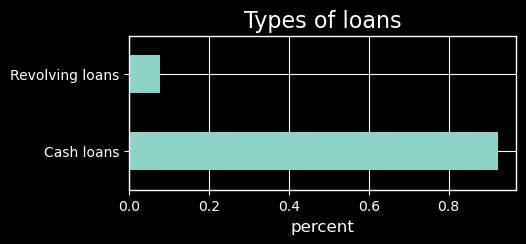

In [128]:
plt.style.use('dark_background')
plt.figure(figsize=[5,2])
final_data.NAME_CONTRACT_TYPE_x.value_counts(normalize=True).plot.barh()
plt.title('Types of loans',fontsize='16')
plt.xlabel('percent')
plt.show()

##### POINTS TO INFER- ALMOST 90% CLIENT'S HAVE APPLIED FOR CASH LOANS

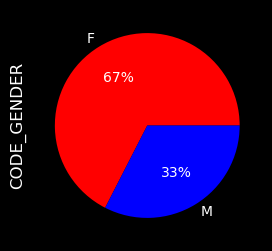

In [129]:
plt.figure(figsize=[6,3])
final_data.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct='%2.0f%%', colors=['red','blue'])
plt.show()


##### 67% OF THE CLIENTS ARE FEMALE WHILE 33% ARE MALES

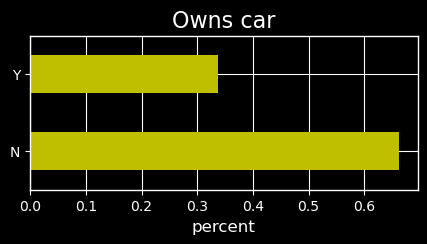

In [130]:
plt.figure(figsize=[5,2])
final_data.FLAG_OWN_CAR.value_counts(normalize=True).plot.barh(color='y')
plt.title('Owns car',fontsize='16')
plt.xlabel('percent')
plt.show()

##### MAJORITY OF THE CLIENTS OWN CAR 

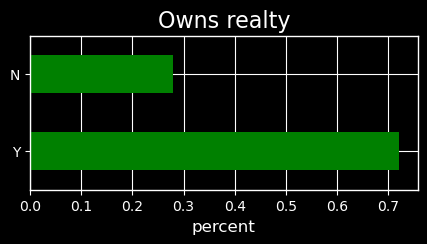

In [131]:
plt.figure(figsize=[5,2])
final_data.FLAG_OWN_REALTY.value_counts(normalize=True).plot.barh(color='g')
plt.title('Owns realty',fontsize='16')
plt.xlabel('percent')
plt.show()

##### MAJORITY OF THE CLIENTS OWN REALTY

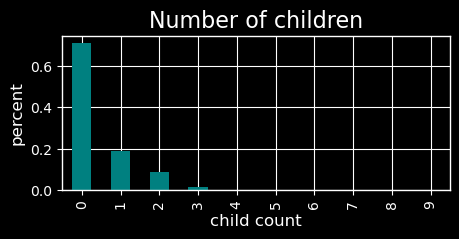

In [132]:
plt.figure(figsize=[5,2])
final_data.CNT_CHILDREN.value_counts(normalize=True).plot.bar(color='teal')
plt.title('Number of children',fontsize='16')
plt.xlabel('child count')
plt.ylabel('percent')
plt.show()

##### ALMOST 70% CLIENTS HAS NO CHILD.

In [133]:
# handling outliers in CNT_CHILDREN
final_data= final_data[final_data.CNT_CHILDREN<10]

In [78]:
final_data.CNT_CHILDREN.value_counts()

0    1017141
1     271245
2     121462
3      17365
4       1936
5        418
6        100
7         19
8          8
9          7
Name: CNT_CHILDREN, dtype: int64

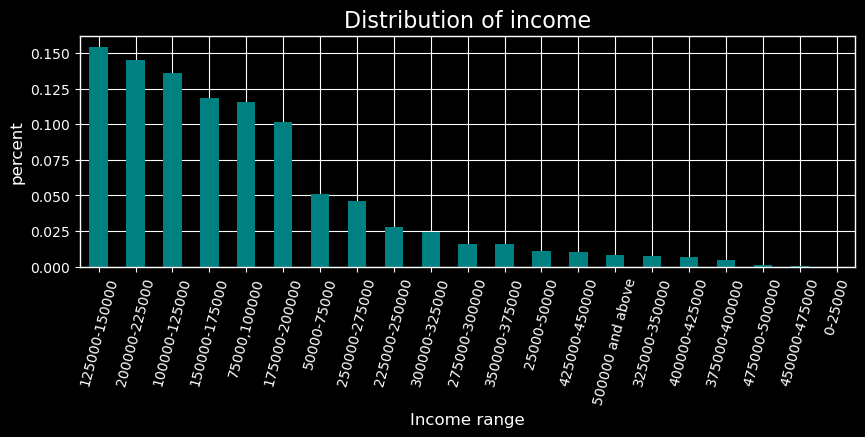

In [134]:
# plotting the income distribution of the clients.
plt.figure(figsize=[10,3])
final_data.AMT_INCOME_RANGE.value_counts(normalize=True).plot.bar(color='teal')
plt.title('Distribution of income',fontsize='16')
plt.xlabel('Income range')
plt.ylabel('percent')
plt.xticks(rotation=75)
plt.show()

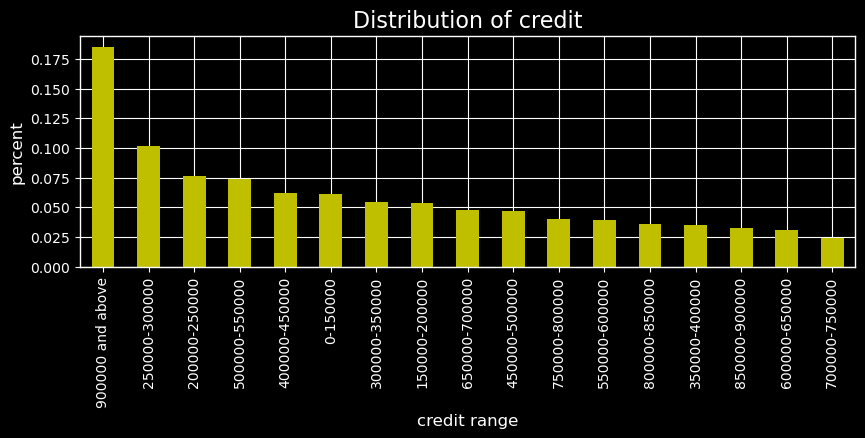

In [135]:
# plotting the credit distribution of the clients.
plt.figure(figsize=[10,3])
final_data.AMT_CREDIT_RANGE.value_counts(normalize=True).plot.bar(color='y')
plt.title('Distribution of credit',fontsize='16')
plt.xlabel('credit range')
plt.ylabel('percent')
plt.show()

##### AMONG THE CREDIT ASKED , 9LAKHS AND ABOVE TOPS THE CHART

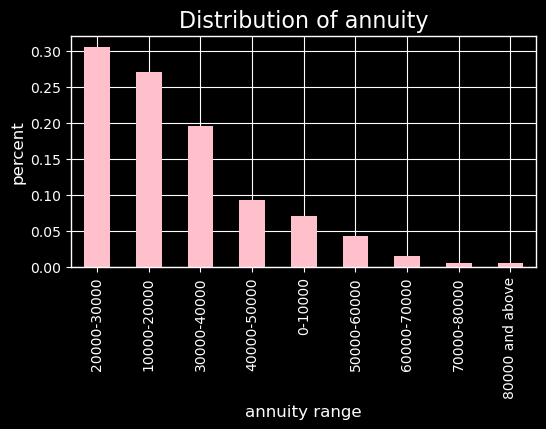

In [136]:
# plotting the loan annuity distribution of the clients.
plt.figure(figsize=[6,3])
final_data.LOAN_ANNUITY_RANGE.value_counts(normalize=True).plot.bar(color='pink')
plt.title('Distribution of annuity',fontsize='16')
plt.xlabel('annuity range')
plt.ylabel('percent')
plt.show()

##### THE MAJORITY OF THE LOAN ANNUITY RANGES BETWEEN 10000-40000.

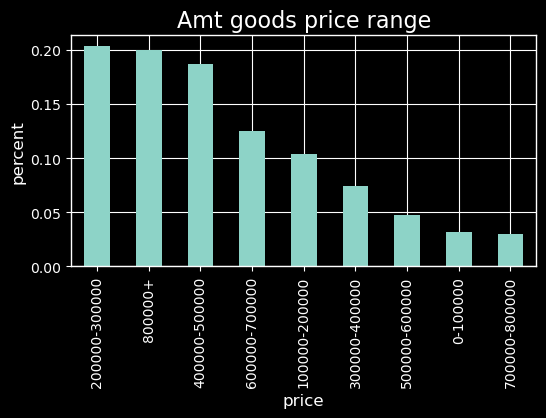

In [137]:
# the goods price for which the client applied in the application

plt.figure(figsize=[6,3])
final_data.AMT_GOODS_PRICE_RANGE.value_counts(normalize=True).plot.bar()
plt.title('Amt goods price range',fontsize='16')
plt.xlabel('price')
plt.ylabel('percent')
plt.show()

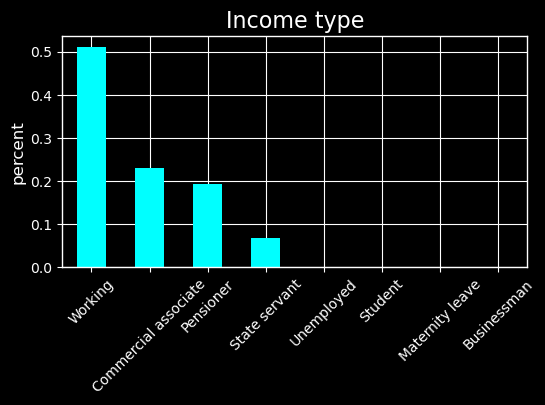

In [138]:
#  plotting the income type
plt.figure(figsize=[6,3])
final_data.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar(color='cyan')
plt.title('Income type',fontsize='16')
plt.xticks(rotation=45)
plt.ylabel('percent')
plt.show()

##### THE MAJORITY OF THE CLIENTS ARE WORKING(51%) OR COMMERCIAL ASSOCIATE(22%)

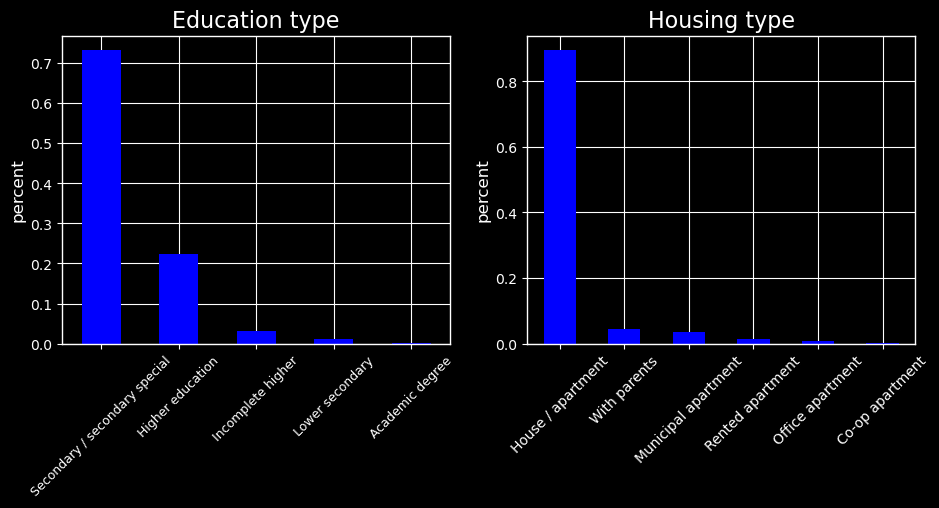

In [139]:
# ploting education type and housing type.
plt.figure(figsize=[11,4])
plt.subplot(1,2,1)
final_data.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar(color='b')
plt.title('Education type',fontsize='16')
plt.xticks(rotation=45,size=9)
plt.ylabel('percent')
plt.subplot(1,2,2)
final_data.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar(color='b')
plt.title('Housing type',fontsize='16')
plt.xticks(rotation=45,size=10)
plt.ylabel('percent')
plt.show()

###### POINTS TO INFER-
 1. MOST OF THE CLIENTS HAVE SECONDARY EDUCATION(75%),FOLLOWED BY HIGHER EDUCATION(22%),AND VERY FEW HAVE ACADEMIC DEGREE.
 2. MAJORITY OF THE CLIENTS LIVE IN HOUSE/APARTMENTS(91%)

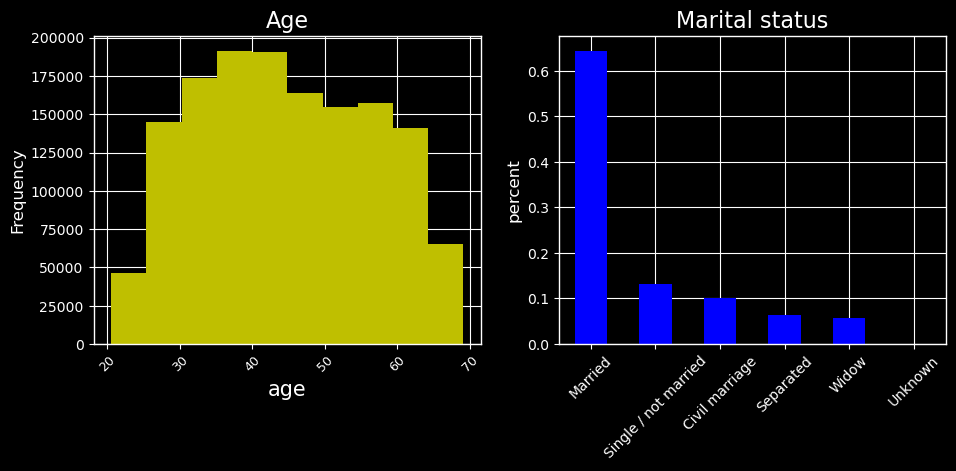

In [140]:
# Plotting age distribution and marital status
plt.figure(figsize=[11,4])
plt.subplot(1,2,1)
final_data.AGE_IN_YEARS.plot.hist(color='y')
plt.title('Age',fontsize='16')
plt.xticks(rotation=45,size=9)
plt.xlabel('age',size=15)
plt.subplot(1,2,2)
final_data.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar(color='b')
plt.title('Marital status',fontsize='16')
plt.xticks(rotation=45,size=10)
plt.ylabel('percent')
plt.show()

##### POINTS TO INFER
1. AGE IS NORMALLY DISTRIBUTED AND PEAKS AT 35-45 YEARS.
2. MAJORITY OF THE CLIENTS ARE MARRIED (66%)

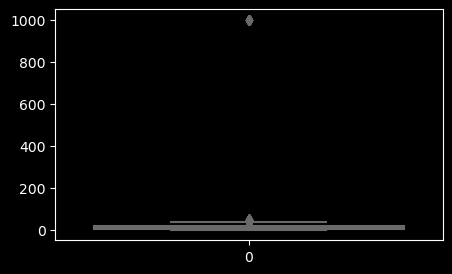

In [86]:
# Plotting box plot for years employed

plt.figure(figsize=[5,3])
sns.boxplot(final_data.YEARS_EMPLOYED)
plt.show()

##### THERE IS MISSING VALUES IN THIS COLUMN WHICH IS REPRESENTED BY A RANDOM BIG NUMBER.

In [87]:
# Replacing this wrong data with missing data.
final_data.loc[final_data.YEARS_EMPLOYED>100,'YEARS_EMPLOYED']= np.NaN
final_data.YEARS_EMPLOYED.describe()

count    1.153357e+06
mean     6.720061e+00
std      6.345434e+00
min      0.000000e+00
25%      2.301370e+00
50%      4.808219e+00
75%      8.915068e+00
max      4.907397e+01
Name: YEARS_EMPLOYED, dtype: float64

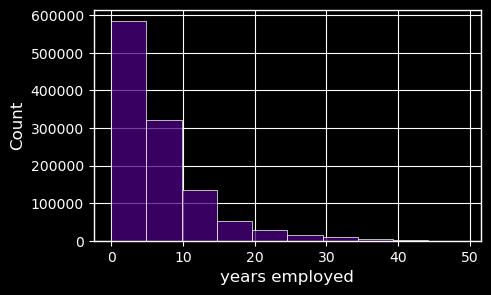

In [141]:
# plotting the distribution of years employed.
plt.figure(figsize=[5,3])
sns.histplot(final_data.YEARS_EMPLOYED,bins=10,color='indigo')
plt.xlabel('years employed')
plt.show()

##### MOST OF THE CLIENTS ARE WORKING FOR THE LAST 10 YEARS.

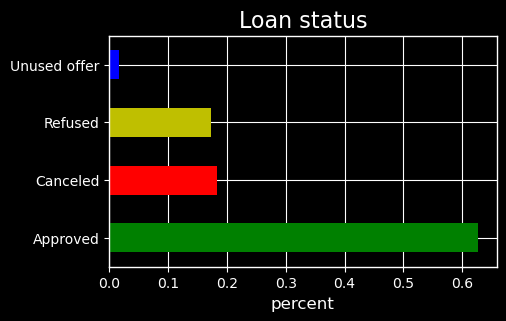

In [142]:
# Plotting loan status for prev application
plt.figure(figsize=[5,3])
final_data.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.barh(color=['green','red','y','b'])
plt.title('Loan status',fontsize='16')
plt.xlabel('percent')
plt.show()

##### MOST OF THE PREVIOUS LOANS WERE APPROVED (62%)

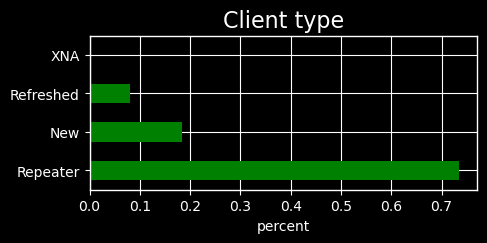

In [143]:
# Plotting CLIENT TYPE for prev application
plt.figure(figsize=[5,2])
final_data.NAME_CLIENT_TYPE.value_counts(normalize=True).plot.barh(color='green')
plt.title('Client type',fontsize='16')
plt.xlabel('percent',size=10)
plt.show()

##### MAJORITY OF THE CLIENTS WERE REPEATERS.

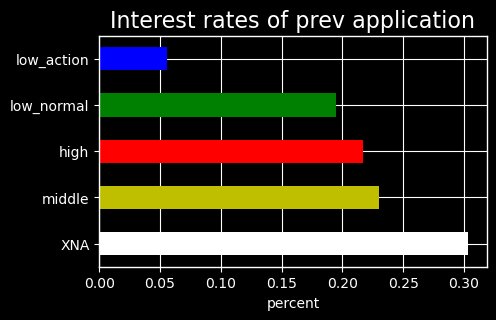

In [144]:
# Plotting interest rates of prev loans
plt.figure(figsize=[5,3])

final_data.NAME_YIELD_GROUP.value_counts(normalize=True).plot.barh(color=['white','y','r','g','b'])
plt.title('Interest rates of prev application',fontsize='16')
plt.xlabel('percent',size=10)

plt.show()

##### 30% data is not known, the decreasing order of the frequency is middle,high, low normal and low action

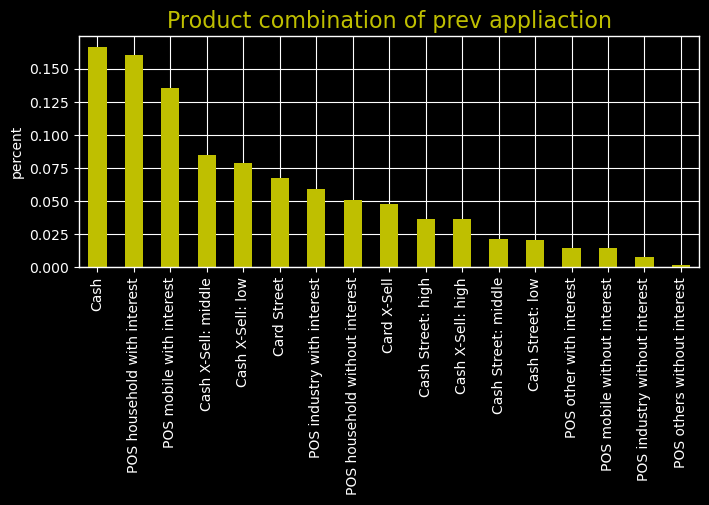

In [145]:
# Plotting product combination of prev loans
plt.figure(figsize=[8,3])
plt.title('Product combination of prev appliaction',fontsize='16',color='y')
plt.ylabel('percent',size=10)
final_data.PRODUCT_COMBINATION.value_counts(normalize=True).plot.bar(color='y')
plt.show()

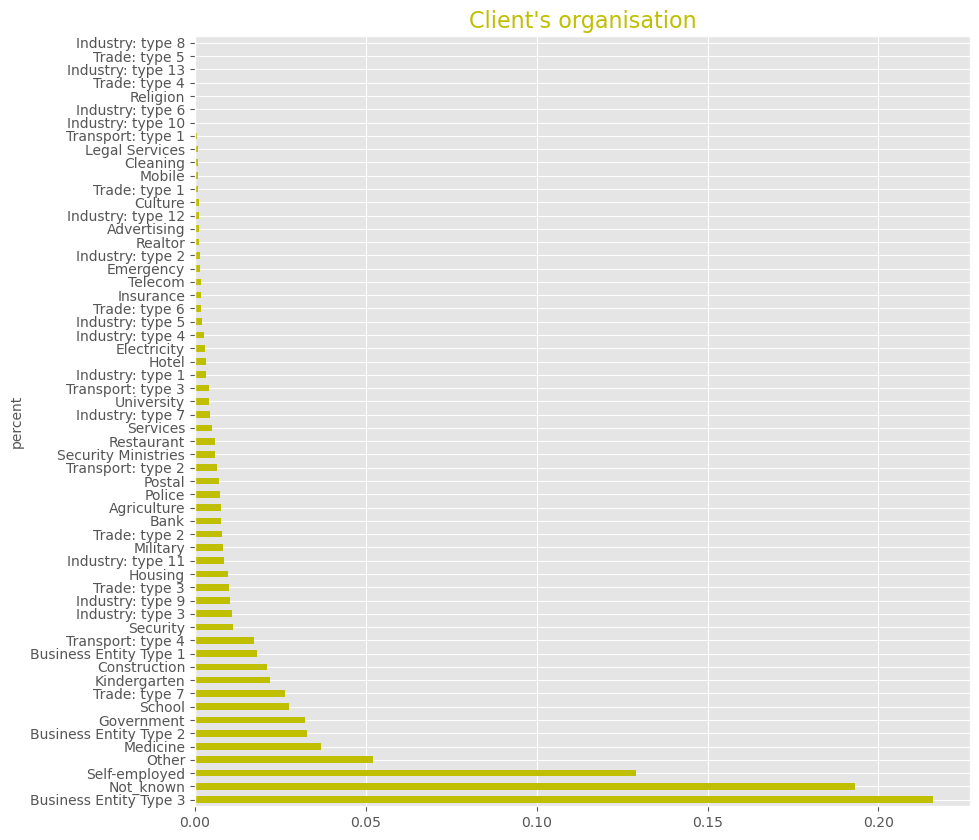

In [93]:
# Plotting clients organisation of prev loans
plt.style.use('ggplot')
plt.figure(figsize=[10,10])
plt.title("Client's organisation",fontsize='16',color='y')
plt.ylabel('percent',size=10)
final_data.ORGANIZATION_TYPE.value_counts(normalize=True).plot.barh(color='y')
plt.show()

##### THE MAJORITY OF THE CLIENT BELONGS TO BUSINESS ENTITY TYPE 3

## BIVARIATE ANALYSIS

DIVIDING THE DATASET INTO TARGET 0 AND TARGET 1.

In [94]:
target0 = final_data.loc[final_data.TARGET==0]
target1 = final_data.loc[final_data.TARGET==1]

THE RELEVENT VARIABLES ARE CHECKED AGAINST THE TARGET VARIABLE TO FIND ANY VARIABLES THAT MAY DRIVE THE TARGET.

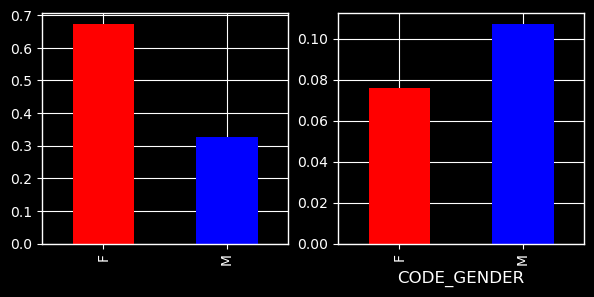

In [95]:
# plotting target vs gender
plt.style.use('dark_background')
plt.figure(figsize=[7,3])
plt.subplot(1,2,1)
final_data.CODE_GENDER.value_counts(normalize=True).plot.bar(color=['r','b'])

plt.subplot(1,2,2)
final_data.groupby('CODE_GENDER')['TARGET'].mean().plot.bar(color=['r','b'])
plt.show()

####  ! ALTHOUGH FEMALE CLIENTS ARE MORE BUT IT THE MALE GENDER WHO IS FACING MORE DIFFICULTY IN REPAYING LOAN COMPARED TO FEMALES.

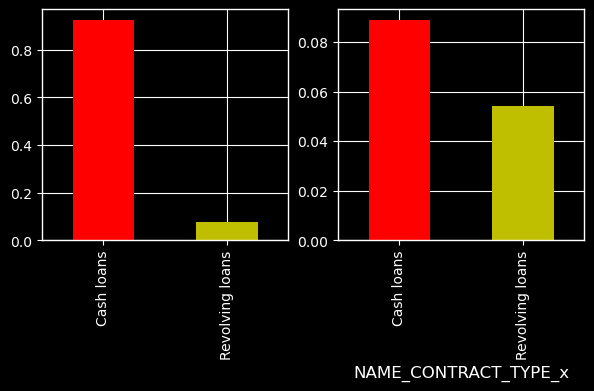

In [96]:
# plotting target vs NAME_CONTRACT_TYPE_x
plt.figure(figsize=[7,3])
plt.subplot(1,2,1)
final_data.NAME_CONTRACT_TYPE_x.value_counts(normalize=True).plot.bar(color=['r','y'])

plt.subplot(1,2,2)
final_data.groupby('NAME_CONTRACT_TYPE_x')['TARGET'].mean().plot.bar(color=['r','y'])
plt.show()

##### REVOLVING LOANS ARE EVEN LESS 10% BUT WHEN IT COMES TO REPAYMENT DIFFICULTY THEY ARE COMPARABLE TO THE CASH LOANS.

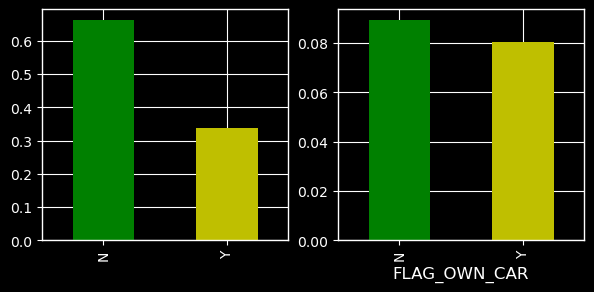

In [97]:
# plotting target vs FLAG OWN CAR
plt.figure(figsize=[7,3])
plt.subplot(1,2,1)
final_data.FLAG_OWN_CAR.value_counts(normalize=True).plot.bar(color=['g','y'])

plt.subplot(1,2,2)
final_data.groupby('FLAG_OWN_CAR')['TARGET'].mean().plot.bar(color=['g','y'])
plt.show()

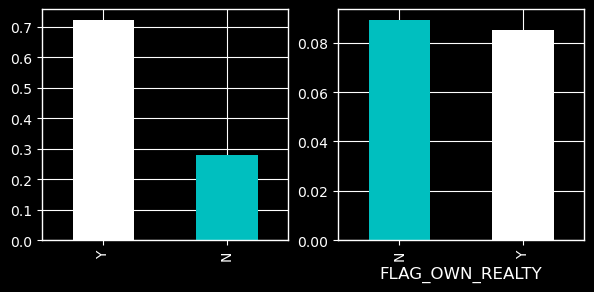

In [147]:
# plotting target vs FLAG OWN REALTY
plt.figure(figsize=[7,3])
plt.subplot(1,2,1)
final_data.FLAG_OWN_REALTY.value_counts(normalize=True).plot.bar(color=['w','c'])

plt.subplot(1,2,2)
final_data.groupby('FLAG_OWN_REALTY')['TARGET'].mean().plot.bar(color=['c','w'])
plt.show()

#### ! MOST OF THE CLIENTS HAVE OWN REALTY (71%),AND THE ONES WHO DON'T ARE FACING MORE DIFFICULTY IN REPAYING THE LOANS.

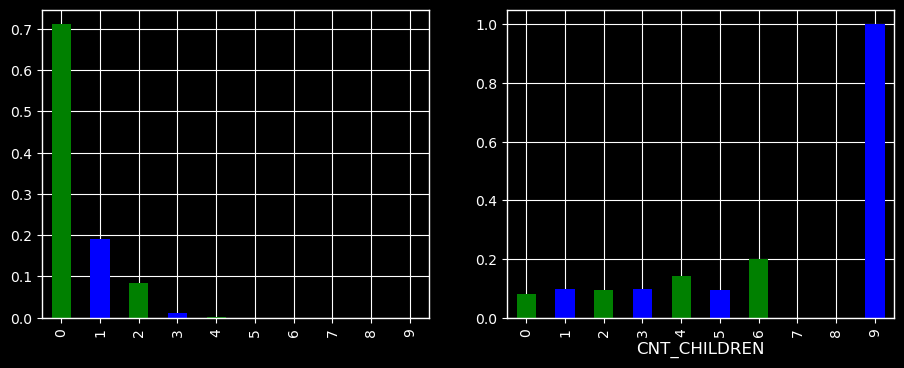

In [99]:
# plotting target vs NUMBER OF CHILDREN CLENT HAS
plt.figure(figsize=[11,4])
plt.subplot(1,2,1)
final_data.CNT_CHILDREN.value_counts(normalize=True).plot.bar(color=['g','b'])

plt.subplot(1,2,2)
final_data.groupby('CNT_CHILDREN')['TARGET'].mean().plot.bar(color=['g','b'])
plt.show()

#### ! THE DIFFICULTY IN REPAYING LOANS GRADUALLY INCREASES AS THE NUMBER OF CHILDREN INCREASES.

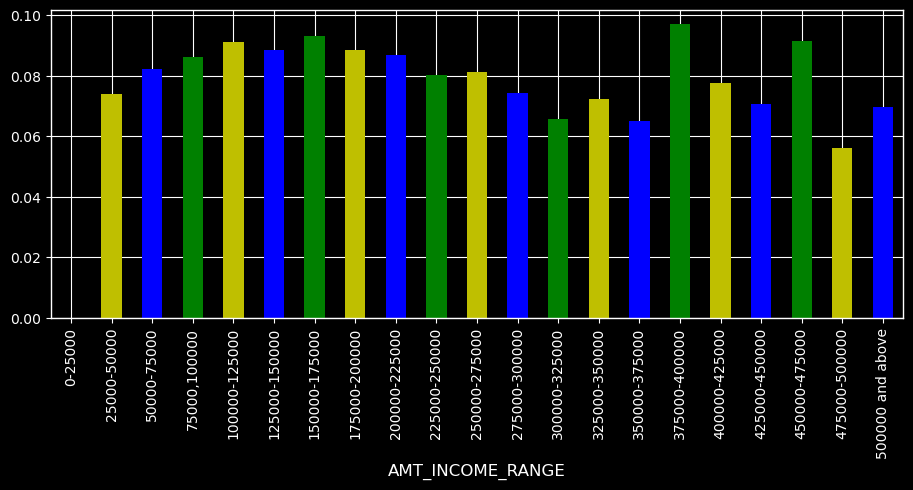

In [100]:
# plotting target vs income range.
plt.figure(figsize=[11,4])
final_data.groupby('AMT_INCOME_RANGE')['TARGET'].mean().plot.bar(color=['g','y','b'])
plt.show()

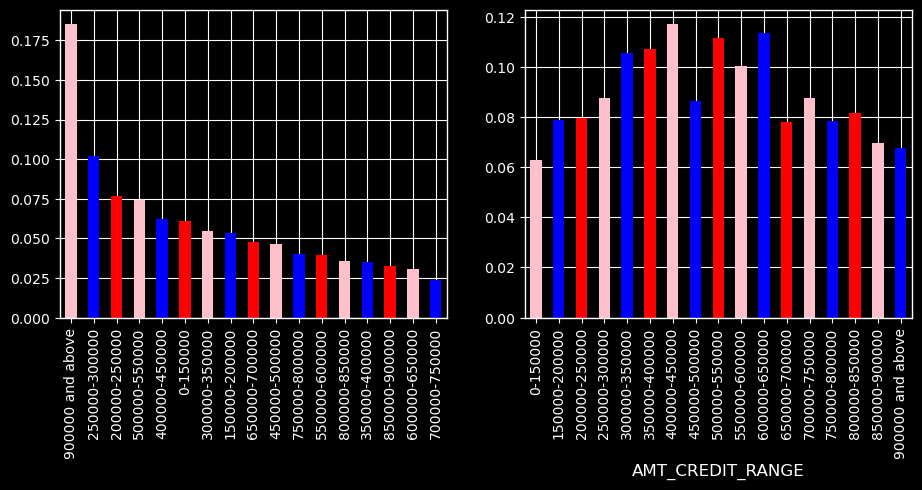

In [101]:
# plotting target vs credit amount range
plt.figure(figsize=[11,4])
plt.subplot(1,2,1)
final_data.AMT_CREDIT_RANGE.value_counts(normalize=True).plot.bar(color=['pink','b','r'])

plt.subplot(1,2,2)
final_data.groupby('AMT_CREDIT_RANGE')['TARGET'].mean().plot.bar(color=['pink','b','r'])
plt.show()

#### AS THE CREDIT AMOUNT INCREASES THE DIFFICULTY INCREASES AND ABOVE 6,50,000 CREDIT THE DIFFICULTY SEEMS TO GET LESS.

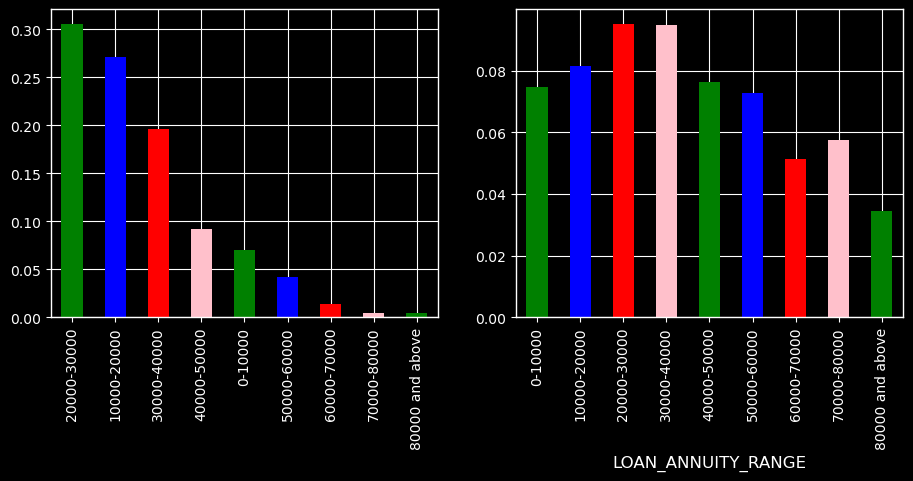

In [102]:
# plotting target vs LOAN ANNUITY 
plt.figure(figsize=[11,4])
plt.subplot(1,2,1)
final_data.LOAN_ANNUITY_RANGE.value_counts(normalize=True).plot.bar(color=['g','b','r','pink'])

plt.subplot(1,2,2)
final_data.groupby('LOAN_ANNUITY_RANGE')['TARGET'].mean().plot.bar(color=['g','b','r','pink'])
plt.show()

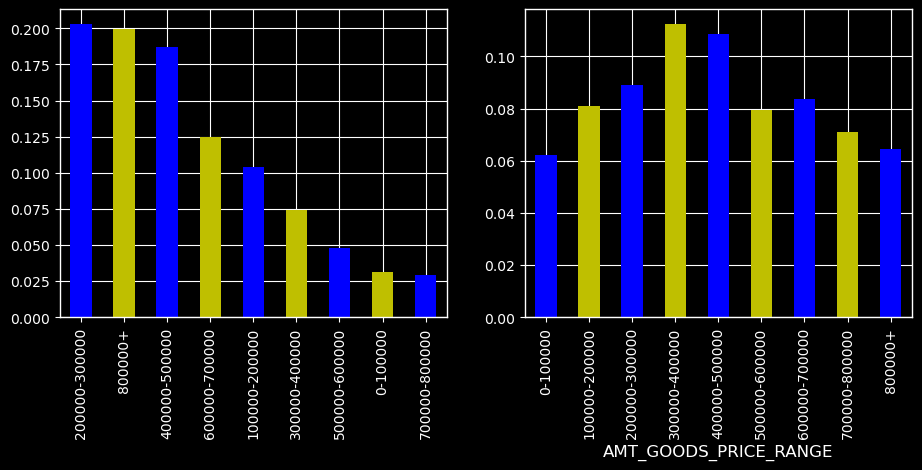

In [103]:
# plotting target vs amount of goods price 
plt.figure(figsize=[11,4])
plt.subplot(1,2,1)
final_data.AMT_GOODS_PRICE_RANGE.value_counts(normalize=True).plot.bar(color=['b','y'])

plt.subplot(1,2,2)
final_data.groupby('AMT_GOODS_PRICE_RANGE')['TARGET'].mean().plot.bar(color=['b','y'])
plt.show()

#### ! ONE INTERESTING THING TO SEE HERE IS THAT THE ONES HAVING LESS DIFFICULTY IN REPAYING LOANS HAVE APPLIED FOR GOODS IN THE LOWER PRICE RANGE AND THE GOODS IN THE HIGHER PRICE RANGE. THE MID PRICED GOODS APPLIERS ARE GETTING MORE DIFFICULTY IN REPAYING

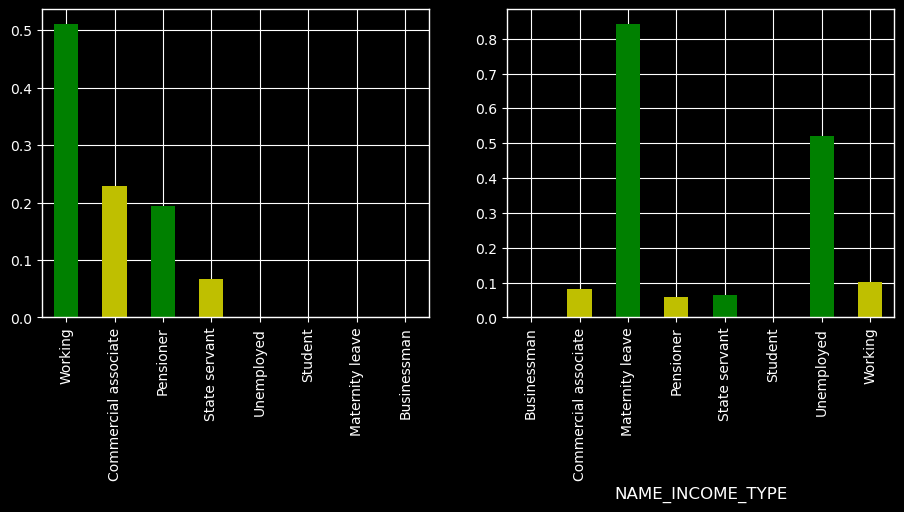

In [104]:
# plotting target vs income type.
plt.figure(figsize=[11,4])
plt.subplot(1,2,1)
final_data.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar(color=['g','y'])

plt.subplot(1,2,2)
final_data.groupby('NAME_INCOME_TYPE')['TARGET'].mean().plot.bar(color=['g','y'])
plt.show()

#### ! UNEMPLOYED AND MATERNITY LEAVE CLIENTS ARE HAVING DIFFICULTY IN PAYING THE LOANS.

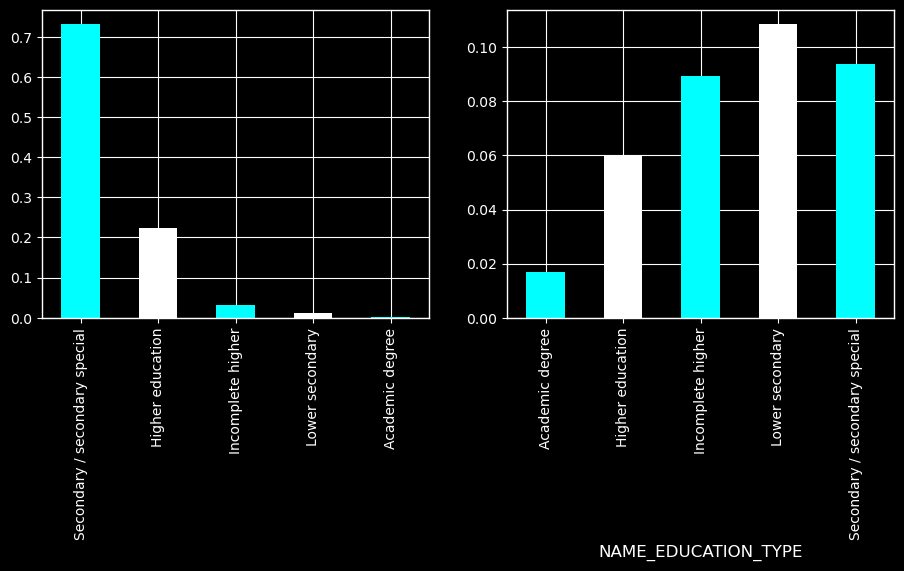

In [105]:
# plotting target vs EDUCATION TYPE

plt.figure(figsize=[11,4])
plt.subplot(1,2,1)
final_data.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar(color=['cyan','w'])

plt.subplot(1,2,2)
final_data.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().plot.bar(color=['cyan','w'])
plt.show()

#### ! HERE WE CAN SEE THE ABILITY TO REPAY LOAN IS DIRECTLY PROPORTIONAL TO THE EDUCATION LEVEL. . THE LOAN PAYING DIFFICULTY ORDER IS  LOWER SEC> SECONDARY> INCOMPLETE HIGHER> HIGHER> ACADEMIC

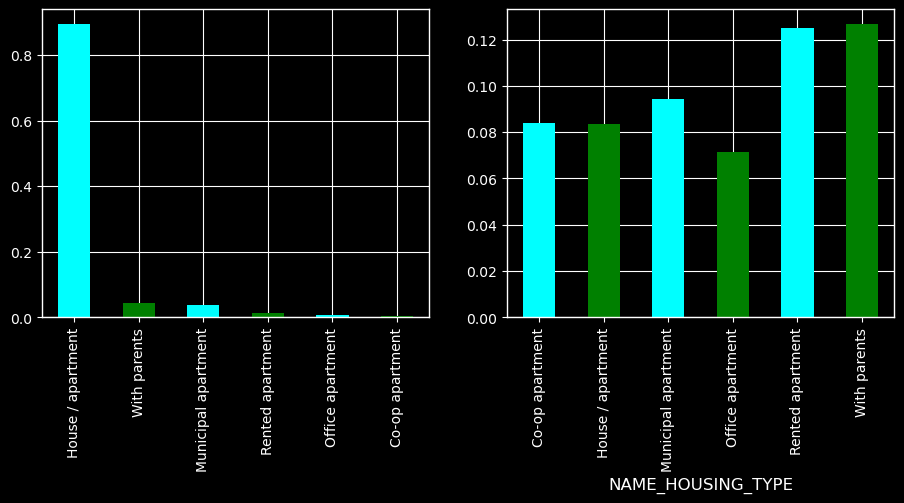

In [106]:
# plotting target vs HOUSING TYPE

plt.figure(figsize=[11,4])
plt.subplot(1,2,1)
final_data.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar(color=['cyan','g'])

plt.subplot(1,2,2)
final_data.groupby('NAME_HOUSING_TYPE')['TARGET'].mean().plot.bar(color=['cyan','g'])
plt.show()

#### ! THE ONES LIVING WITH PARENTS OR RENTED APARTMENTS ARE HAVING THE MAXIMUM PROBLEM OF LOAN REPAYMENT

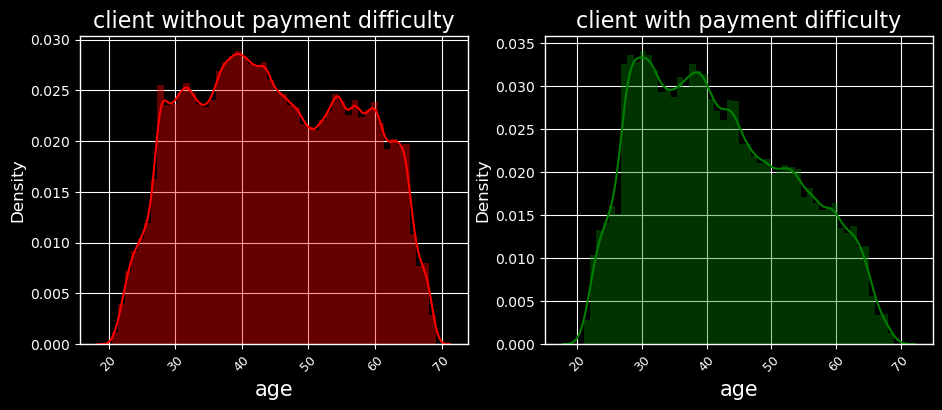

In [107]:
# plotting target vs AGE

plt.figure(figsize=[11,4])
plt.subplot(1,2,1)
sns.distplot(target0.AGE_IN_YEARS,color='red')
plt.title('client without payment difficulty',fontsize='16')
plt.xticks(rotation=45,size=9)
plt.xlabel('age',size=15)
plt.subplot(1,2,2)
sns.distplot(target1.AGE_IN_YEARS,color='green')
plt.title('client with payment difficulty',fontsize='16')
plt.xticks(rotation=45,size=9)
plt.xlabel('age',size=15)
plt.show()

#### ! AS THE AGE INCREASES BEYOND 40YEARS THE DIFFICULTY ALSO DECREASES.

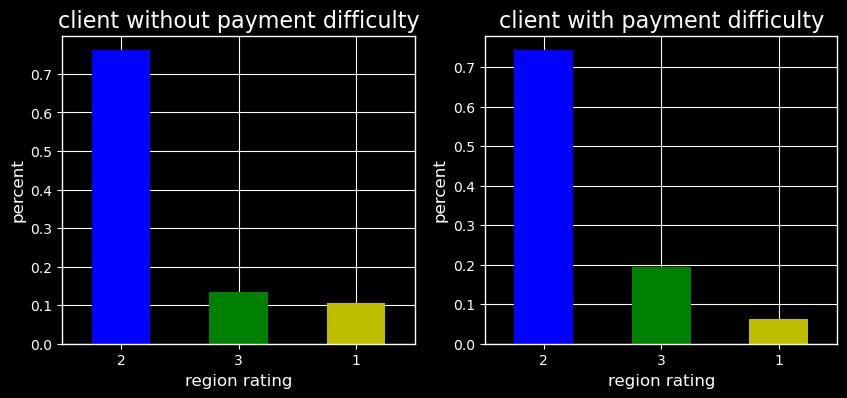

In [108]:
# plotting target vs REGION RATING WRT CITY
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title('client without payment difficulty',fontsize='16')
target0.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True).plot.bar(color=['b','g','y'])
plt.xlabel('region rating')
plt.xticks(rotation=0)
plt.ylabel('percent')
plt.subplot(1,2,2)
plt.title('client with payment difficulty',fontsize='16')
target1.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True).plot.bar(color=['b','g','y'])
plt.xlabel('region rating')
plt.xticks(rotation=0)
plt.ylabel('percent')
plt.show()

#### ! ON COMPARING WE CAN SEE      (A). CLIENTS LIVING IN RATING 3 ARE HAVING MORE DIFFICULTY.                                                                                                                    (B). CLIENTS LIVING IN RATING 1 ARE HAVING LESS DIFFICULTY


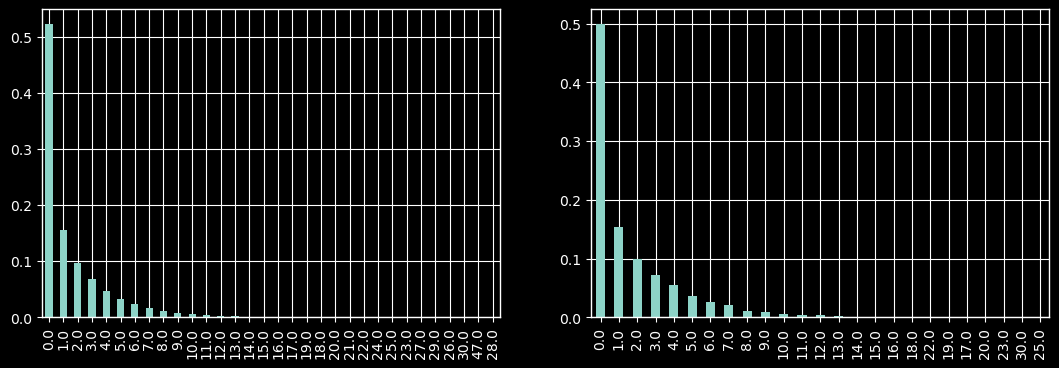

In [109]:
# plotting target vs OBS_30_CNT_SOCIAL_CIRCLE
plt.figure(figsize=[13,4])
plt.subplot(1,2,1)
target0.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
target1.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True).plot.bar()
plt.show()

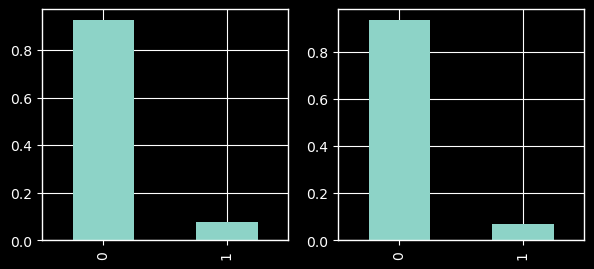

In [110]:
# plotting target vs FLAG DOC 8
plt.figure(figsize=[7,3])
plt.subplot(1,2,1)
target0.FLAG_DOCUMENT_8.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
target1.FLAG_DOCUMENT_8.value_counts(normalize=True).plot.bar()
plt.show()

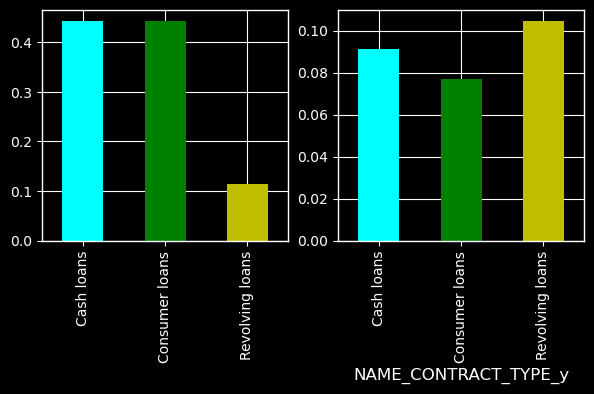

In [111]:
# plotting target vs NAME_CONTRACT_TYPE for prev appn
plt.figure(figsize=[7,3])
plt.subplot(1,2,1)
final_data.NAME_CONTRACT_TYPE_y.value_counts(normalize=True).plot.bar(color=['cyan','g','y'])
plt.subplot(1,2,2)
final_data.groupby('NAME_CONTRACT_TYPE_y')['TARGET'].mean().plot.bar(color=['cyan','g','y'])
plt.show()

#### ! REVOLVING LOANS WERE THE LEAST APPLIED FOR , AND THE ONES WHO APPLIED FOR IT  ARE HAVING MORE  DIFFICULTY TO REPAY THE CURRENT LOAN.

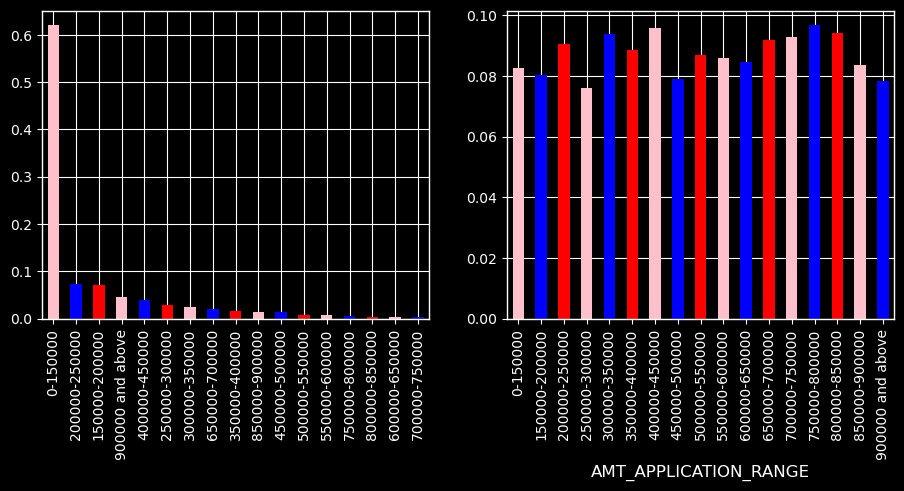

In [112]:
# plotting target vs AMT_APPLICATION_RANGE
plt.figure(figsize=[11,4])
plt.subplot(1,2,1)
final_data.AMT_APPLICATION_RANGE.value_counts(normalize=True).plot.bar(color=['pink','b','r'])
plt.subplot(1,2,2)
final_data.groupby('AMT_APPLICATION_RANGE')['TARGET'].mean().plot.bar(color=['pink','b','r'])
plt.show()

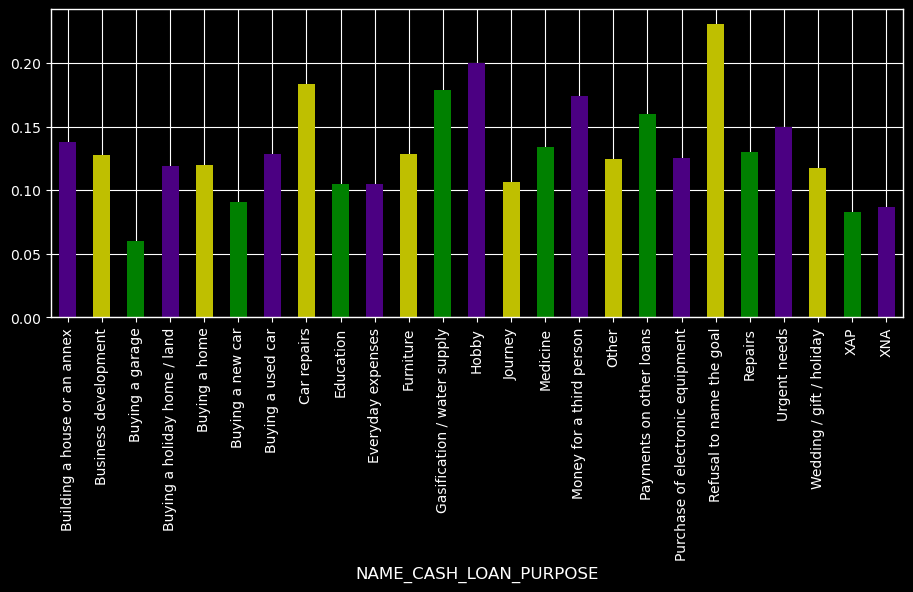

In [113]:
# plotting target vs PURPOSE OF CASH LOAN

plt.figure(figsize=[11,4])
final_data.groupby('NAME_CASH_LOAN_PURPOSE')['TARGET'].mean().plot.bar(color=['indigo','y','g'])
plt.show()

#### ! THE CLIENTS WHO REFUSED TO NAME THE PURPOSE  FOR THE PREV LOAN ARE THE ONES HAVING MOST DIFFICULTY IN PAYING THE CURRENT ONE, FOLLOWED BY HOBBY AND CAR REPAIRS.

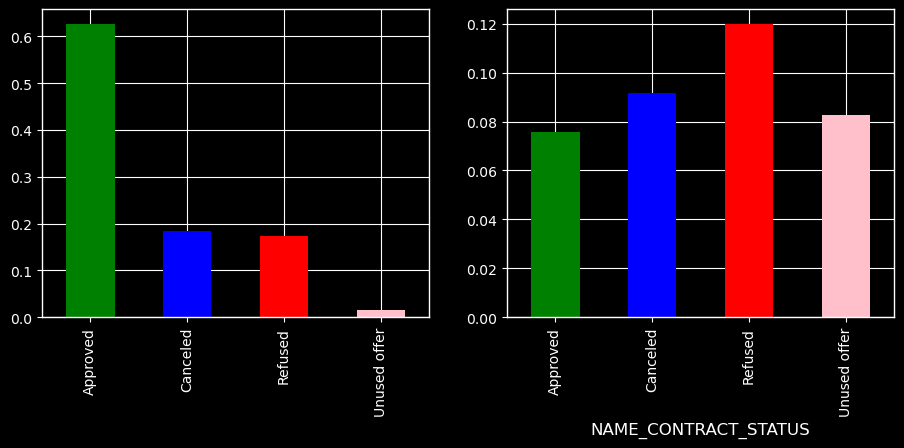

In [114]:
# plotting target vs PREV CONTRACT STATUS
plt.figure(figsize=[11,4])
plt.subplot(1,2,1)
final_data.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar(color=['g','b','r','pink'])
plt.subplot(1,2,2)
final_data.groupby('NAME_CONTRACT_STATUS')['TARGET'].mean().plot.bar(color=['g','b','r','pink'])
plt.show()

#### ! ONE IMP THING TO SEE HERE IS THAT CLIENTS WHOSE PREV APPN WAS REJECTED ARE HAVING DIFFICULTY IN PAYING FOR THE CURRENT LOAN, FOLLOWED BY CANCELED AND UNUSED OFFER.

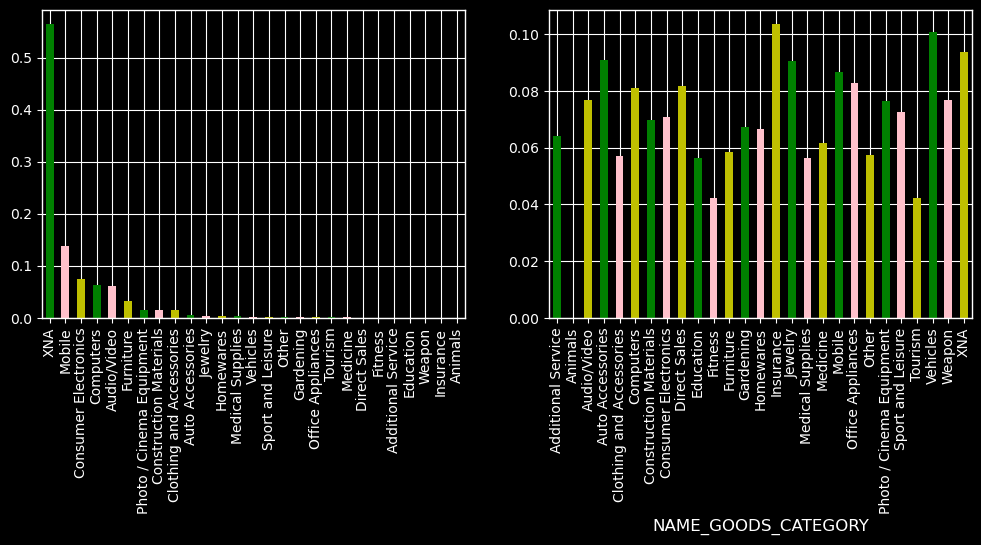

In [115]:
# plotting target vs NAME_GOODS_CATEGORY
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
final_data.NAME_GOODS_CATEGORY.value_counts(normalize=True).plot.bar(color=['g','pink','y'])
plt.subplot(1,2,2)
final_data.groupby('NAME_GOODS_CATEGORY')['TARGET'].mean().plot.bar(color=['g','pink','y'])
plt.show()

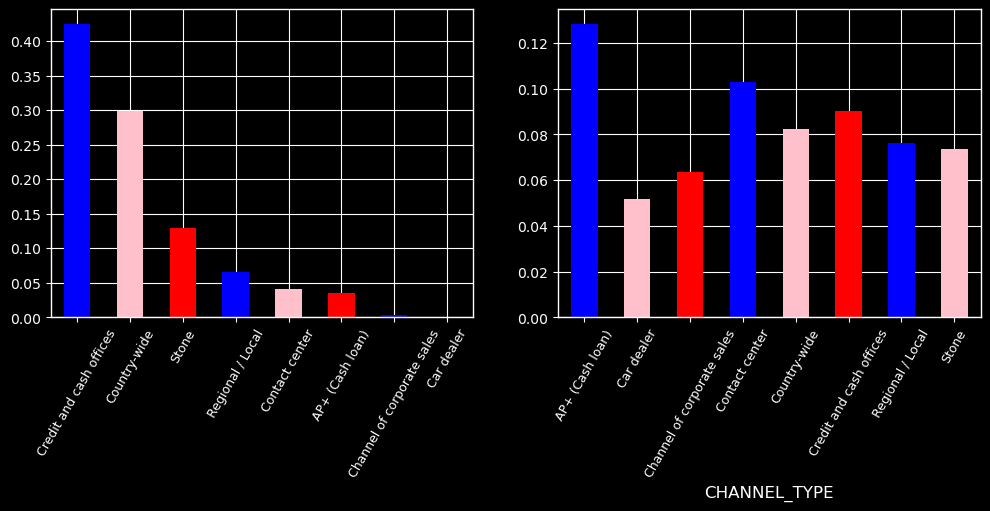

In [116]:
# plotting target vs CHANNEL_TYPE
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
final_data.CHANNEL_TYPE.value_counts(normalize=True).plot.bar(color=['b','pink','r'])
plt.xticks(rotation=60,size=9)
plt.subplot(1,2,2)
final_data.groupby('CHANNEL_TYPE')['TARGET'].mean().plot.bar(color=['b','pink','r'])
plt.xticks(rotation=60,size=9)
plt.show()

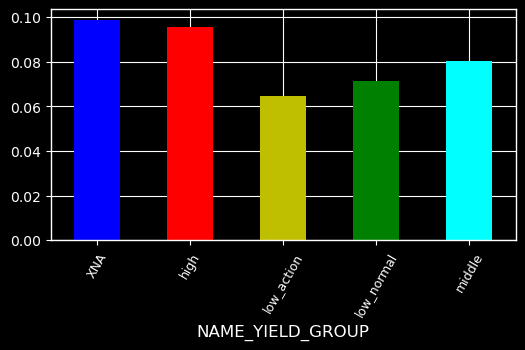

In [117]:
# plotting target vs INTEREST RATE OF PREV LOAN
plt.figure(figsize=[6,3])
final_data.groupby('NAME_YIELD_GROUP')['TARGET'].mean().plot.bar(color=['b','r','y','g','cyan'])
plt.xticks(rotation=60,size=9)
plt.show()

#### ! AS PER THIS PLOT THE LOAN REPAYMENT DIFFICULTY IS DEPENDENT ON THE INTEREST RATE OF THE PREV LOAN. THE HIGH INTEREST RATE PAYING CLIENTS ARE FACING MOST DIFFICULTY AND THE LOW ACTION INTEREST RATE THE LEAST.

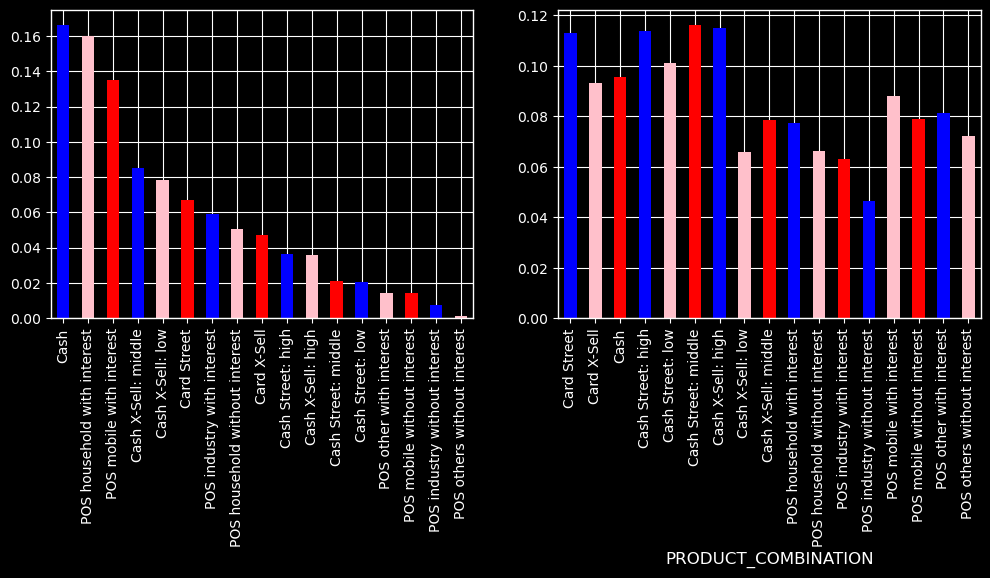

In [118]:
# plotting target vs PRODUCT COMBINATION
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
final_data.PRODUCT_COMBINATION.value_counts(normalize=True).plot.bar(color=['b','pink','r'])
plt.subplot(1,2,2)
final_data.groupby('PRODUCT_COMBINATION')['TARGET'].mean().plot.bar(color=['b','pink','r'])
plt.show()

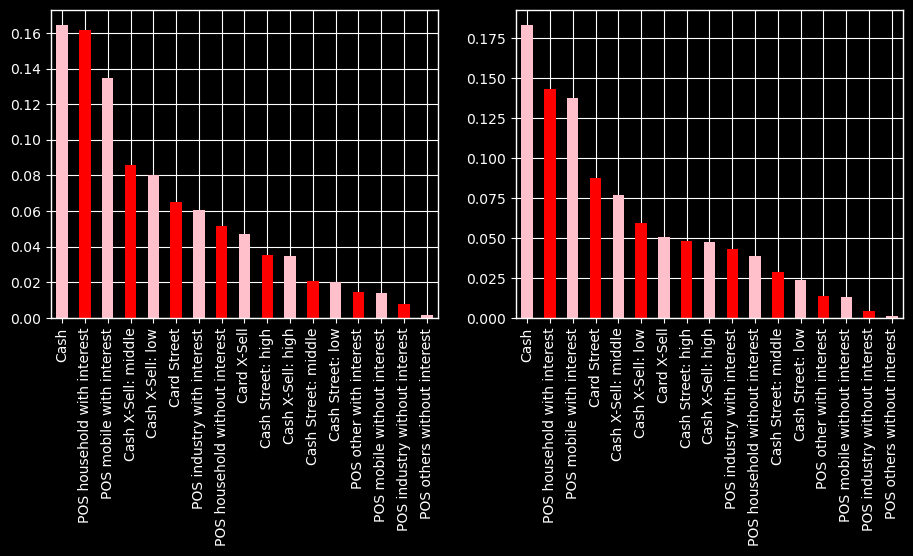

In [119]:
plt.figure(figsize=[11,4])
plt.subplot(1,2,1)
target0.PRODUCT_COMBINATION.value_counts(normalize=True).plot.bar(color=['pink','r'])

plt.subplot(1,2,2)
target1.PRODUCT_COMBINATION.value_counts(normalize=True).plot.bar(color=['pink','r'])
plt.show()

### CORRELATION MATRIX FOR CLIENTS WITH PAYMENT DIFFICULTIES AND ALL OTHER CASES.

In [120]:
# Plotting correlation matrix for all other cases
target0_correlation= target0.corr
target0.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_CONT_MOBILE,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_DECISION,CNT_PAYMENT,AGE_IN_YEARS,YEARS_EMPLOYED
SK_ID_CURR,1.000000,NaN,-0.003491,0.003871,-0.002032,0.003451,-0.000990,-0.001911,-0.000682,0.001717,...,0.001324,-0.004695,-0.000558,0.002789,-0.000822,0.005181,-0.000397,-0.000140,0.002369,-0.001465
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.003491,NaN,1.000000,-0.190089,0.013945,0.000501,0.022260,0.033347,0.082216,0.074664,...,-0.002362,0.057972,-0.016035,0.062035,-0.016331,-0.061387,-0.014012,-0.047961,-0.368743,-0.072396
DAYS_REGISTRATION,0.003871,NaN,-0.190089,1.000000,0.100319,0.000800,-0.071700,-0.066431,-0.102098,-0.076027,...,-0.004484,-0.037561,-0.002338,-0.059716,0.003814,0.040702,-0.019236,0.029110,0.328369,0.169044
DAYS_ID_PUBLISH,-0.002032,NaN,0.013945,0.100319,1.000000,-0.001528,0.008820,-0.068901,-0.100779,-0.067618,...,-0.001830,-0.061744,-0.004610,-0.034708,0.021543,0.067643,-0.043703,0.025496,0.261729,0.075099
FLAG_CONT_MOBILE,0.003451,NaN,0.000501,0.000800,-0.001528,1.000000,0.007943,-0.000571,0.001916,0.002785,...,-0.000173,0.010923,0.003736,-0.009640,0.006084,0.005851,0.000096,-0.001186,0.005246,0.002316
REGION_RATING_CLIENT_W_CITY,-0.000990,NaN,0.022260,-0.071700,0.008820,0.007943,1.000000,0.042219,0.020883,-0.007658,...,0.013650,0.048972,-0.011840,-0.087889,0.007159,0.000925,0.008451,0.008571,-0.011636,0.008592
REG_CITY_NOT_LIVE_CITY,-0.001911,NaN,0.033347,-0.066431,-0.068901,-0.000571,0.042219,1.000000,0.431452,0.030937,...,0.006139,0.006165,0.000801,0.021008,-0.004475,-0.019125,0.023328,-0.022662,-0.178014,-0.108802
REG_CITY_NOT_WORK_CITY,-0.000682,NaN,0.082216,-0.102098,-0.100779,0.001916,0.020883,0.431452,1.000000,0.835278,...,-0.000282,0.057119,0.017564,0.049228,-0.010837,-0.029586,0.009733,-0.024447,-0.248898,-0.121945
LIVE_CITY_NOT_WORK_CITY,0.001717,NaN,0.074664,-0.076027,-0.067618,0.002785,-0.007658,0.030937,0.835278,1.000000,...,-0.004327,0.052685,0.018600,0.047656,-0.010572,-0.025565,-0.001250,-0.013331,-0.170377,-0.073522


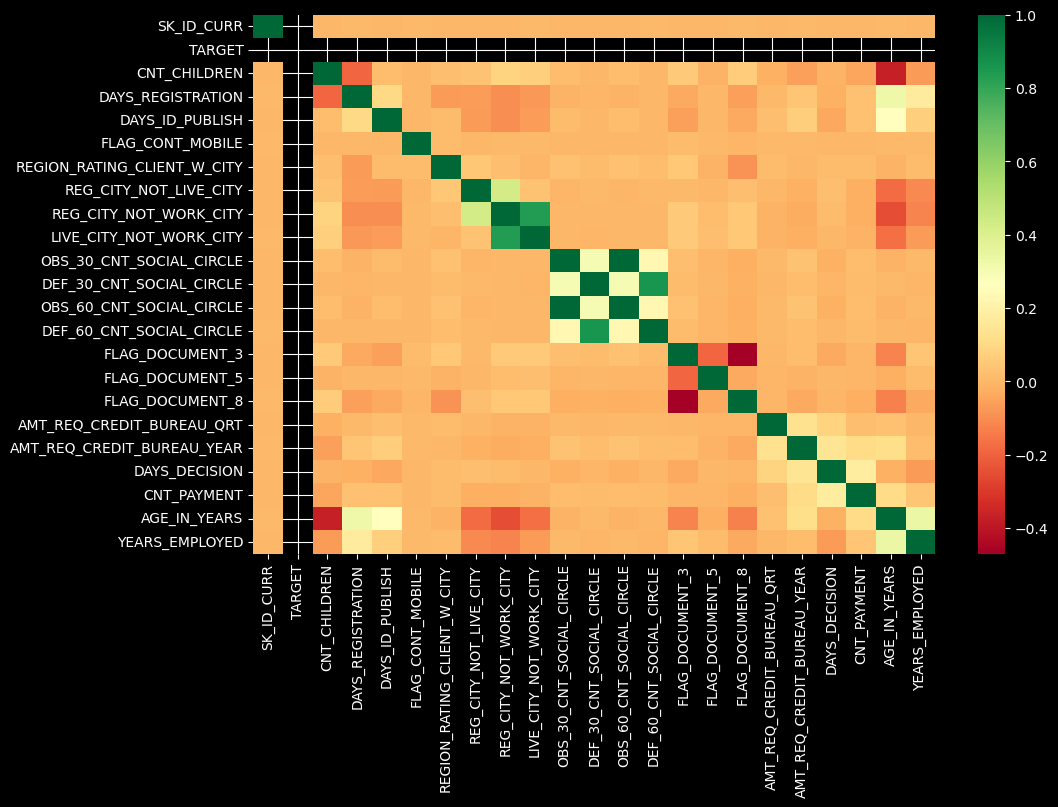

In [121]:
# HEAT MAP FOR CORRELATION
plt.figure(figsize=[11,7])
sns.heatmap(target0.corr(), cmap='RdYlGn')
plt.show()

In [122]:
# Plotting correlation matrix for all clients with payment difficulties.
target1.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_CONT_MOBILE,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_DECISION,CNT_PAYMENT,AGE_IN_YEARS,YEARS_EMPLOYED
SK_ID_CURR,1.000000,NaN,0.001401,-0.006453,0.000655,0.001687,-0.001178,0.005296,0.006059,0.000674,...,-0.003736,-0.004903,0.004609,0.005682,0.000677,-0.002344,0.000318,-0.001840,-0.000643,0.009501
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,0.001401,NaN,1.000000,-0.152837,0.018955,-0.000683,0.037264,0.008681,0.058409,0.062563,...,0.000979,0.057790,-0.019818,0.040776,-0.015805,-0.039920,-0.009898,-0.038707,-0.295600,-0.044611
DAYS_REGISTRATION,-0.006453,NaN,-0.152837,1.000000,0.098927,-0.003676,-0.082857,-0.045805,-0.086046,-0.066048,...,-0.010420,-0.045093,-0.012993,-0.045747,0.011979,0.035674,-0.028515,0.036355,0.282394,0.143265
DAYS_ID_PUBLISH,0.000655,NaN,0.018955,0.098927,1.000000,-0.014840,-0.002683,-0.062557,-0.072360,-0.037795,...,0.005196,-0.042890,0.001610,-0.023158,0.005829,0.073327,-0.084443,0.042856,0.235592,0.083585
FLAG_CONT_MOBILE,0.001687,NaN,-0.000683,-0.003676,-0.014840,1.000000,0.002650,-0.001496,0.008666,0.007005,...,-0.015796,0.002094,0.003676,0.004415,0.004366,0.008198,0.002394,0.003032,0.000641,0.006373
REGION_RATING_CLIENT_W_CITY,-0.001178,NaN,0.037264,-0.082857,-0.002683,0.002650,1.000000,0.054988,0.020667,-0.016943,...,0.015843,0.035577,-0.003602,-0.035912,0.017931,0.023616,0.028390,0.007202,-0.044944,-0.005127
REG_CITY_NOT_LIVE_CITY,0.005296,NaN,0.008681,-0.045805,-0.062557,-0.001496,0.054988,1.000000,0.465835,-0.005819,...,0.006371,0.009291,0.006239,0.010714,0.007394,-0.016185,0.031381,-0.033081,-0.157260,-0.108678
REG_CITY_NOT_WORK_CITY,0.006059,NaN,0.058409,-0.086046,-0.072360,0.008666,0.020667,0.465835,1.000000,0.792664,...,-0.009941,0.064741,0.020670,0.022819,-0.021086,-0.034016,0.023441,-0.033734,-0.217296,-0.130312
LIVE_CITY_NOT_WORK_CITY,0.000674,NaN,0.062563,-0.066048,-0.037795,0.007005,-0.016943,-0.005819,0.792664,1.000000,...,-0.022848,0.055986,0.019995,0.027493,-0.031262,-0.025701,0.006370,-0.014347,-0.130494,-0.070637


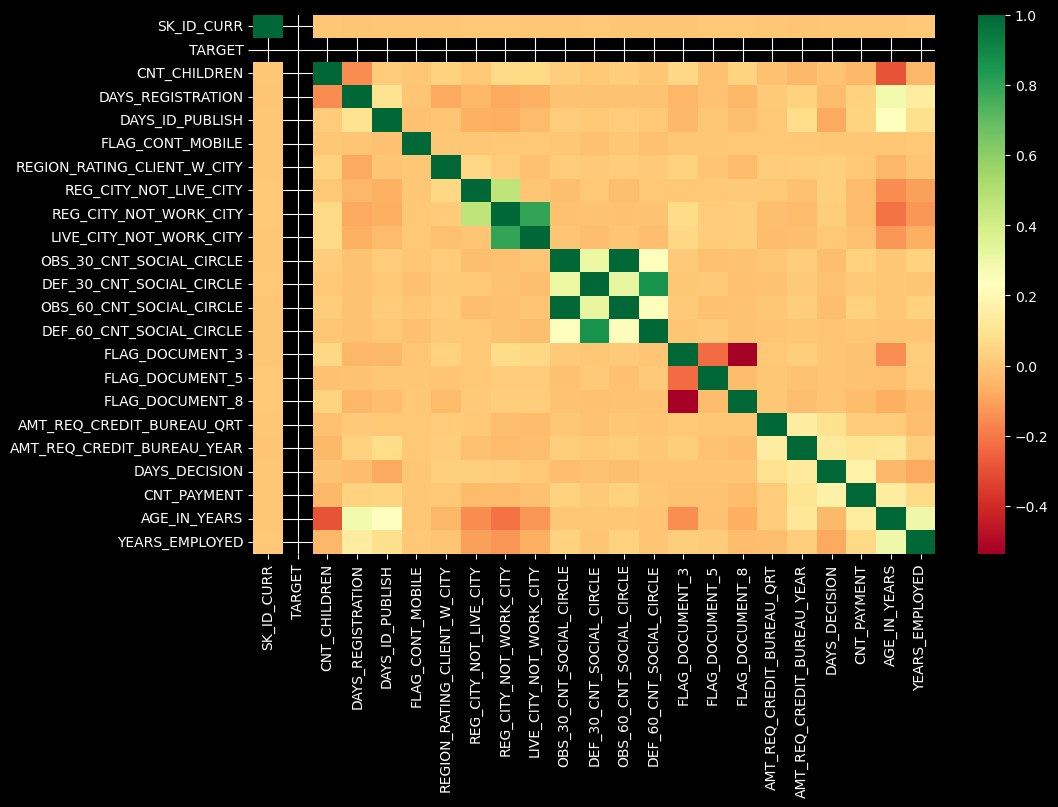

In [123]:
# HEAT MAP FOR CORRELATION
plt.figure(figsize=[11,7])
sns.heatmap(target1.corr(), cmap='RdYlGn')
plt.show()

### TOP 10 CORRELATION FOR ALL OTHER CASES

1.  DEF_30_CNT_SOCIAL_CIRCLE - DEF_60_CNT_SOCIAL_CIRCLE
2.  DEF_30_CNT_SOCIAL_CIRCLE - OBS_60_CNT_SOCIAL_CIRCLE
3.  DEF_60_CNT_SOCIAL_CIRCLE - OBS_60_CNT_SOCIAL_CIRCLE
4.  DEF_30_CNT_SOCIAL_CIRCLE - OBS_30_CNT_SOCIAL_CIRCLE
5.  OBS_30_CNT_SOCIAL_CIRCLE - OBS_60_CNT_SOCIAL_CIRCLE
6.  DEF_60_CNT_SOCIAL_CIRCLE - OBS_30_CNT_SOCIAL_CIRCLE
7.  REG_CITY_NOT_WORK_CITY   - REG_CITY_NOT_LIVE_CITY
8.  LIVE_CITY_NOT_WORK_CITY  - REG_CITY_NOT_WORK_CITY
9.  FLAG_DOCUMENT_3          - FLAG_DOCUMENT_5
10. FLAG_DOCUMENT_3          - FLAG_DOCUMENT_8 

### TOP 10 CORRELATION FOR CLIENTS WITH PAYMENT DIFFICULTIES

1.  OBS_30_CNT_SOCIAL_CIRCLE - OBS_60_CNT_SOCIAL_CIRCLE
2.  LIVE_CITY_NOT_WORK_CITY  - REG_CITY_NOT_WORK_CITY
3.  REG_CITY_NOT_WORK_CITY   - REG_CITY_NOT_LIVE_CITY
4.  DEF_30_CNT_SOCIAL_CIRCLE - DEF_60_CNT_SOCIAL_CIRCLE
5.  DEF_30_CNT_SOCIAL_CIRCLE - OBS_30_CNT_SOCIAL_CIRCLE
6.  DEF_30_CNT_SOCIAL_CIRCLE - OBS_60_CNT_SOCIAL_CIRCLE
7.  AGE_IN_YEARS             - YEARS_EMPLOYED
8.  FLAG_DOCUMENT_3          - FLAG_DOCUMENT_5
9.  FLAG_DOCUMENT_3          - FLAG_DOCUMENT_8  
10. DEF_60_CNT_SOCIAL_CIRCLE - OBS_30_CNT_SOCIAL_CIRCLE

### DRIVER VARIABLES FOR LOAN DEFAULT
1. CODE_GENDER
2. NAME_INCOME_TYPE
3. NAME_EDUCATION_TYPE
4. AGE_IN_YEARS
5. REGION_RATING_CLIENT_W_CITY
6. NAME_CONTRACT_STATUS
7. NAME_YIELD_GROUP
8. NAME_HOUSING_TYPE
9. FLAG_OWN_REALTY
10. NAME_CONTRACT_TYPE_y